# Histogram Plot of Color Channels for Image
### Import necessory Libaraies

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

### Load the image

In [2]:
image_path = "pexels-apostrophy-studio-1098460.jpg"

### Check if the image path exists

In [3]:
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The image path '{image_path}' does not exist. Please provide a valid path.")

In [4]:
image = cv2.imread(image_path)

### Check if the image was loaded successfully

In [5]:
if image is None:
    raise ValueError(f"Failed to load image. Please check if the file at '{image_path}' is a valid image.")

### Convert the image from BGR to RGB

In [6]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### Calculate the histogram for each color channel

In [7]:
channels = ('b', 'g', 'r')
hist_data = {}
for i, channel in enumerate(channels):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    hist_data[channel] = hist

### Plot histograms for each color channel

In [8]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

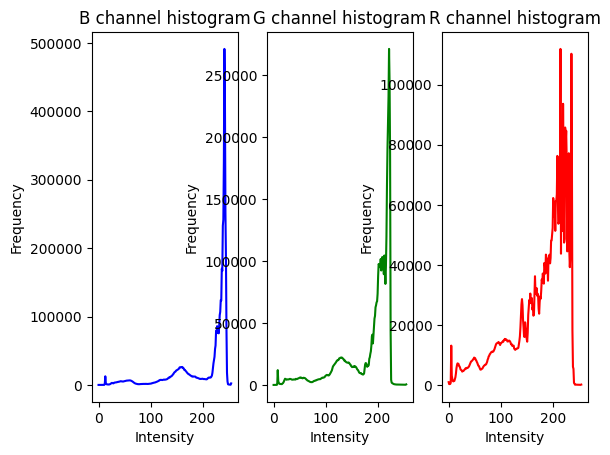

In [9]:
for i, channel in enumerate(channels):
    plt.subplot(1, 3, i + 1)
    plt.plot(hist_data[channel], color=channel)
    plt.title(f'{channel.upper()} channel histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')

In [10]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Advanced Visualization: 2D Histogram for color channels

In [11]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

### Plotting 2D histogram for Red and Green channels

Text(0, 0.5, 'Green Intensity')

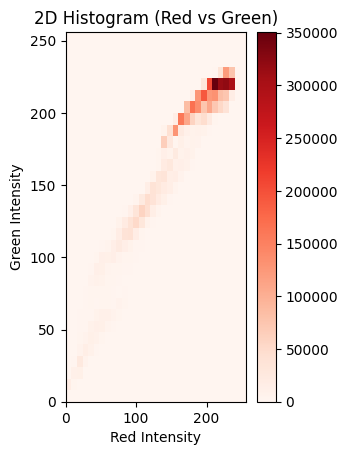

In [12]:
plt.subplot(1, 2, 1)
plt.hist2d(image_rgb[:, :, 0].ravel(), image_rgb[:, :, 1].ravel(), bins=32, range=[[0, 256], [0, 256]], cmap='Reds')
plt.colorbar()
plt.title('2D Histogram (Red vs Green)')
plt.xlabel('Red Intensity')
plt.ylabel('Green Intensity')

### Plotting 2D histogram for Green and Blue channels

Text(0, 0.5, 'Blue Intensity')

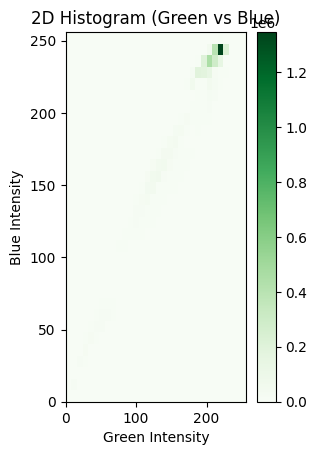

In [13]:
plt.subplot(1, 2, 2)
plt.hist2d(image_rgb[:, :, 1].ravel(), image_rgb[:, :, 2].ravel(), bins=32, range=[[0, 256], [0, 256]], cmap='Greens')
plt.colorbar()
plt.title('2D Histogram (Green vs Blue)')
plt.xlabel('Green Intensity')
plt.ylabel('Blue Intensity')

In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Advanced Visualization: Histogram Equalization

### Equalize the histogram for each channel

In [15]:
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
image_equalized = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

### Display the original and equalized images side by side

Text(0.5, 1.0, 'Original Image')

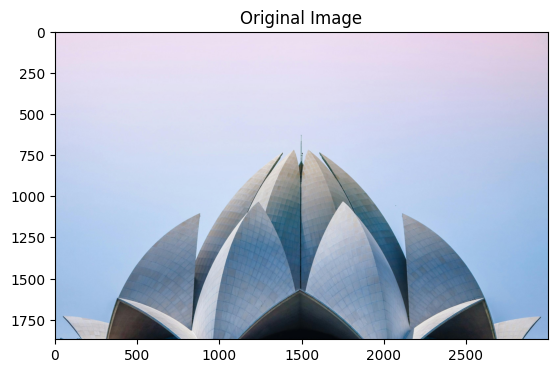

In [16]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

Text(0.5, 1.0, 'Histogram Equalized Image')

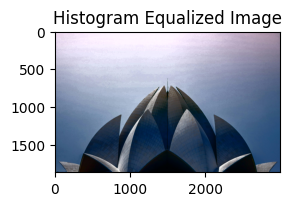

In [17]:
plt.subplot(1, 2, 2)
plt.imshow(image_equalized)
plt.title('Histogram Equalized Image')

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>